<a href="https://colab.research.google.com/github/Dunya18/Simple-neural-network/blob/main/SimpleNeuralNetworkWithPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python modules

In [ ]:
import torch # to create tensors to store all numerical data values including raw data, weight, bias .. 
import torch.nn as nn # to make weight and bias tensors part of the nn
import torch.nn.functional as F # for activation functions
from torch.optim import SGD # short for Stochastic Gradient Descent 

import matplotlib.pyplot as plt
import seaborn as sns

# Creating new neural network with optimal values

In [ ]:
class BasicNN(nn.Module):
  
  def __init__(self):
    super().__init__()
    # initialize weights and biases
    self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad=False)
    self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad=False)

    self.w10 = nn.Parameter(torch.tensor(12.6),requires_grad=False)
    self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad=False)
    self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad=False)

    self.final_bias = nn.Parameter(torch.tensor(-16.),requires_grad=False)

# now we need to connect them to the input, activation functions and the output
# in other words, we create a forward pass through the nn that we initialized
  def forward(self, input):
    # connect the input to the activation function on top
    input_to_top_relu = input*self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)
    scaled_top_relu_output = top_relu_output*self.w01

    # connect the input to the activation function on bottom
    input_to_bottom_relu = input*self.w10 + self.b10
    bottom_relu_output = F.relu(input_to_bottom_relu)
    scaled_bottom_relu_output = bottom_relu_output*self.w11

    input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
    output = F.relu(input_to_final_relu)

    return output




    

**Testing if forward function works correctly**

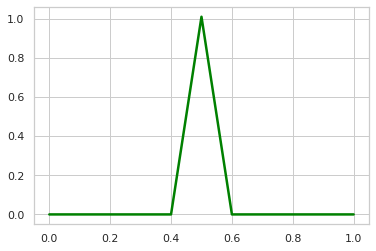

In [ ]:
input_doses = torch.linspace(start=0, end = 1, steps = 11)
# we use model and nn interchangebly
model = BasicNN()
output_values = model(input_doses)
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,
                 y=output_values,
                 color='green',
                 linewidth=2.5)
plt.ylab = "Effectiveness"
plt.xlab = "Dose"

# Creating the training class

In [ ]:
class BasicNN_train(nn.Module):
  
  def __init__(self):
    super().__init__()
    # initialize weights and biases
    self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad=False)
    self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad=False)

    self.w10 = nn.Parameter(torch.tensor(12.6),requires_grad=False)
    self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad=False)
    self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad=False)

    self.final_bias = nn.Parameter(torch.tensor(0.),requires_grad=True)

# now we need to connect them to the input, activation functions and the output
# in other words, we create a forward pass through the nn that we initialized
  def forward(self, input):
    # connect the input to the activation function on top
    input_to_top_relu = input*self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)
    scaled_top_relu_output = top_relu_output*self.w01

    # connect the input to the activation function on bottom
    input_to_bottom_relu = input*self.w10 + self.b10
    bottom_relu_output = F.relu(input_to_bottom_relu)
    scaled_bottom_relu_output = bottom_relu_output*self.w11

    input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
    output = F.relu(input_to_final_relu)

    return output




    

# Optimizing a parameter with backpropagation

Final bias, before optimization : Parameter containing:
tensor(0., requires_grad=True)

actual step : 0
 Final bias for the moment : Parameter containing:
tensor(-3.2020, requires_grad=True)

actual step : 1
 Final bias for the moment : Parameter containing:
tensor(-5.7636, requires_grad=True)

actual step : 2
 Final bias for the moment : Parameter containing:
tensor(-7.8129, requires_grad=True)

actual step : 3
 Final bias for the moment : Parameter containing:
tensor(-9.4523, requires_grad=True)

actual step : 4
 Final bias for the moment : Parameter containing:
tensor(-10.7638, requires_grad=True)

actual step : 5
 Final bias for the moment : Parameter containing:
tensor(-11.8131, requires_grad=True)

actual step : 6
 Final bias for the moment : Parameter containing:
tensor(-12.6525, requires_grad=True)

actual step : 7
 Final bias for the moment : Parameter containing:
tensor(-13.3240, requires_grad=True)

actual step : 8
 Final bias for the moment : Parameter containing:
tensor(-1

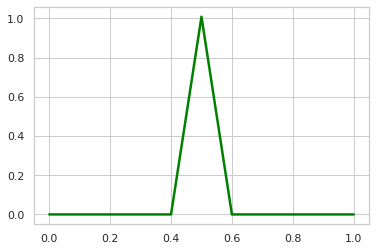

In [ ]:
from torch.optim.optimizer import Optimizer
# class & data we gonna test
input_doses = torch.linspace(start=0, end = 1, steps = 11)
model = BasicNN_train()
# create training data
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0.,1.,0.]) # it has the observed output values

# pass model.paramters to SGD() which will optimize every parameter that we set require_grad = true
# set learning rate to 0.1
optimizer = SGD(model.parameters(), lr= 0.1)
print("Final bias, before optimization : " +str(model.final_bias)+ "\n")

# epoch stands for : everytime our training data run through our model
for epoch in range(100):

  total_loss = 0 # store the loss, which is a measure for how well the model fits the data
  # nested loops that runs each data point from the training data through the model and calculate the loss
  for iterations in range(len(inputs)):
    input_i = inputs[iterations]
    label_i = labels[iterations]
    
    output_i = model(input_i)
    # we calculate the loss between the predicted value and the known label with a loss function
    # we choose the squared residual
    loss = (output_i - label_i)**2
    # calculate the derivative of the loss function with respect to the parameter we want to optimize 
    loss.backward() # at the second iteration, the new derivative is added to the old one (calculated at the first iteration) et ainsi de suite ..
    # add the squared residual to total loss as a track to how well the data fits
    total_loss += float(loss)

  # out of the nested loop
  # check if loss is really small
  #if so, the model fits the training data and we can stop training
  if(total_loss <0.0001):
    print("Num steps : " + str(epoch))
    break


  # othrewise, if total_loss is not small, then we take a small step towards a better value of b final
  optimizer.step()
  # we reset the derivative that we stored in model ** loss backward**
  optimizer.zero_grad()

  print("actual step : "+ str(epoch)+ "\n Final bias for the moment : " + str(model.final_bias) + "\n")


# result graph
output_values = model(input_doses)
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,
                 y=output_values.detach(),
                 color='green',
                 linewidth=2.5)
plt.ylab = "Effectiveness"
plt.xlab = "Dose"


# Testing with the training class

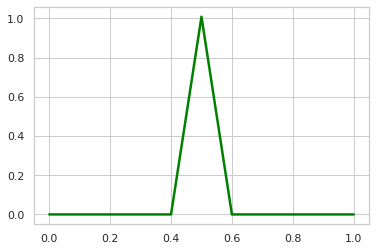

In [ ]:
output_values = model(input_doses)
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,
                 y=output_values.detach(),
                 color='green',
                 linewidth=2.5)
plt.ylab = "Effectiveness"
plt.xlab = "Dose"